<a href="https://colab.research.google.com/github/linainsaf/ML-M1/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import libraries and modules 
# Import libraries and modules 
import numpy as np 
import time 
np.random.seed(123) 
# for reproducibility

from matplotlib import pyplot as plt 
from sklearn import svm
import cvxopt

In [2]:
def aff_donnees(X,y,bornex,borney,s):
   plt.scatter(X[:, 0], X[:, 1], c=y, s=s, cmap='winter'); 
   plt.xlim(bornex); 
   plt.ylim(borney);

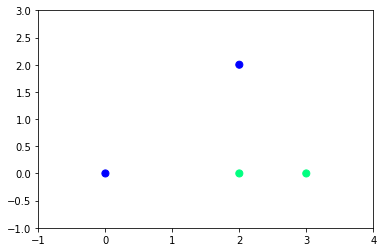

In [3]:
X=np.array([[0,0],[2,2],[2,0],[3,0]])
y=np.array([-1,-1,1,1])
bornex=np.array([np.min(X[:,0]-1),np.max(X[:,0]+1)])
borney=np.array([np.min(X[:,1]-1),np.max(X[:,1]+1)])
s=50

aff_donnees(X,y,bornex,borney,s)

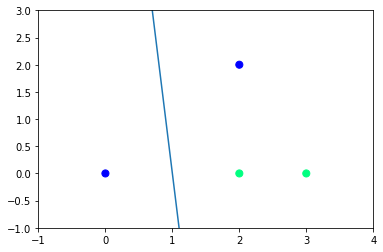

In [4]:
def affichePlan(w,b,bornex):
  x1=np.linspace(bornex[0],bornex[1])
  x2=(-b-w[0]*x1)/w[1]
  plt.plot(x1,x2)
  plt.show()

w=np.array([1,0.1])
b=-1

aff_donnees(X,y,bornex,borney,s)
affichePlan(w,b,bornex)

# d'apres le resultat obtenu, ce n'est pas un plan séparateur

     pcost       dcost       gap    pres   dres
 0:  3.2653e-01  1.9592e+00  6e+00  2e+00  4e+00
 1:  1.5796e+00  8.5663e-01  7e-01  3e-16  3e-15
 2:  1.0195e+00  9.9227e-01  3e-02  5e-16  3e-15
 3:  1.0002e+00  9.9992e-01  3e-04  3e-16  2e-15
 4:  1.0000e+00  1.0000e+00  3e-06  3e-16  1e-15
 5:  1.0000e+00  1.0000e+00  3e-08  0e+00  1e-15
Optimal solution found.


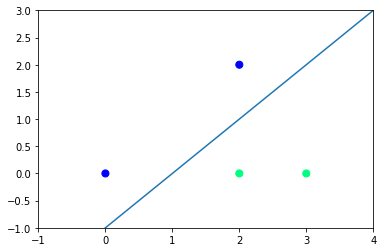

In [5]:
# SVM linéaire dans le primal

def Resoud_primal(X,y):
   N =  y.shape[0]
   n =  X.shape[1]
   q =  cvxopt.matrix(np.zeros([n+1,1]))

   P1=np.concatenate((np.zeros((1,1)),np.zeros((1,n))),axis=1) 
   P2=np.concatenate((np.zeros((n,1)),np.eye(n)),axis=1)
   P=np.concatenate((P1,P2),axis=0) 
   P=cvxopt.matrix(P) 
   for i in range(N): 
     g=np.concatenate((np.reshape(-y[i],(1,1)), np.reshape(-y[i]*X[i][:],(1,2))),axis=1) 
     if i==0: 
       G=g 
     else:
       G=np.concatenate((G, g), axis=0) 
   G=cvxopt.matrix(G+0.) 
   h = cvxopt.matrix(-np.ones([N,1]))
   sol = cvxopt.solvers.qp(P,q,G,h) 
   z= sol['x']
   b= z[0]
   w= z[1:]
   return w,b

w,b=Resoud_primal(X,y)
aff_donnees(X,y,bornex,borney,s)
affichePlan(w,b,bornex)
# l'hyperplan obtenu est correct



     pcost       dcost       gap    pres   dres
 0:  1.8212e-01  5.5124e+00  1e+01  2e+00  5e+00
 1:  5.5352e-01  1.0158e+01  5e+00  1e+00  3e+00
 2:  1.0266e+00  4.3072e+01  7e+00  1e+00  3e+00
 3:  9.6056e+00  1.2385e+02  2e+01  1e+00  2e+00
 4:  5.1885e+02  2.6193e+02  3e+02  4e-15  4e-11
 5:  3.2241e+02  3.1119e+02  1e+01  1e-14  4e-11
 6:  3.1309e+02  3.1298e+02  1e-01  2e-16  7e-11
 7:  3.1300e+02  3.1300e+02  1e-03  2e-15  3e-11
 8:  3.1300e+02  3.1300e+02  1e-05  4e-15  3e-11
Optimal solution found.


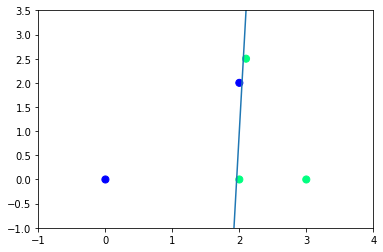

In [6]:
# ajout d'un point x d'etiquette 1 [2.1,2.5]
X1=np.array([[0,0],[2,2],[2,0],[3,0],[2.1,2.5]])
y1=np.array([-1,-1,1,1,1])
bornex=np.array([np.min(X1[:,0]-1),np.max(X1[:,0]+1)])
borney=np.array([np.min(X1[:,1]-1),np.max(X1[:,1]+1)])

w,b=Resoud_primal(X1,y1)
aff_donnees(X1,y1,bornex,borney,s)
affichePlan(w,b,bornex)

# l'hyperplan est correct mais avec une marge très petite

In [7]:
# ajout d'un point x d'etiquette 1 [1.5,2.5]
X2=np.array([[0,0],[2,2],[2,0],[3,0],[1.5,2.5]])
y2=np.array([-1,-1,1,1,1])
# l'hyperplan n'existe pas

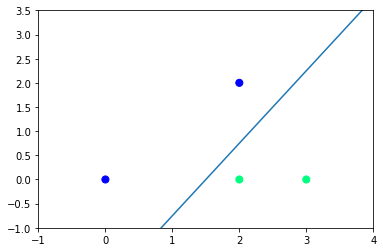

In [8]:
# SVM à marge souple
model = svm.SVC(kernel='linear', C=0.2) 
model.fit(X, y)
w = model.coef_[0] 
b = model.intercept_[0]

aff_donnees(X,y,bornex,borney,s)
affichePlan(w,b,bornex)
# la constante C :
# C règle le compromis entre une grande marge et le respect des contraintes
# •Si C est grand,la marge sera petite pour que le maximum de point soit bien classé
# •Si C est petit,la marge sera plus grande car on est plus laxiste sur les données mal classées
# •C est à optimiser sur une base de validation

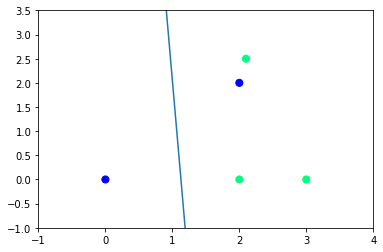

In [9]:
model = svm.SVC(kernel='linear', C=0.5) 
model.fit(X1, y1)
w = model.coef_[0] 
b = model.intercept_[0]

aff_donnees(X1,y1,bornex,borney,s)
affichePlan(w,b,bornex)

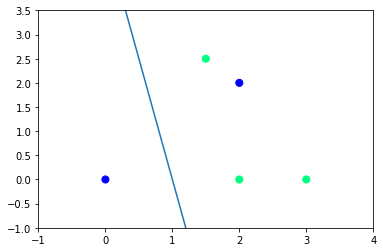

In [11]:
model = svm.SVC(kernel='linear', C=1) 
model.fit(X2, y2)
w = model.coef_[0] 
b = model.intercept_[0]

aff_donnees(X2,y2,bornex,borney,s)
affichePlan(w,b,bornex)

In [14]:
# SVM avec Kernel
f = np.load('TP6.npz',allow_pickle=True) 
X=f['arr_0']
y=f['arr_1']

def aff_frontiere(X,y,bornex,borney,model):
  aff_donnees(X,y,bornex,borney,50)
  xx, yy = np.meshgrid(np.linspace(bornex[0], bornex[1],50), np.linspace(borney[0], borney[1],50))
  xy = np.concatenate((np.reshape(xx,(xx.shape[0]*xx.shape[1],1)),np.reshape(yy,(yy.shape[0]*yy.shape[1],1))),axis=1)
  P = model.predict(xy)
  aff_donnees(xy,P,bornex,borney,1)

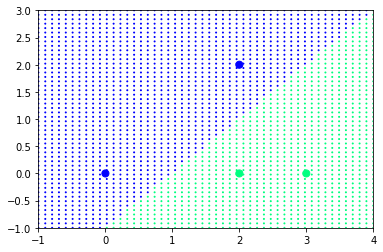

In [15]:
X=np.array([[0,0],[2,2],[2,0],[3,0]])
y=np.array([-1,-1,1,1])

bornex=np.array([np.min(X[:,0]-1),np.max(X[:,0]+1)])
borney=np.array([np.min(X[:,1]-1),np.max(X[:,1]+1)])

model = svm.SVC(kernel='linear', C=1) 
model.fit(X, y)
w = model.coef_[0] 
b = model.intercept_[0]

aff_frontiere(X,y,bornex,borney,model)

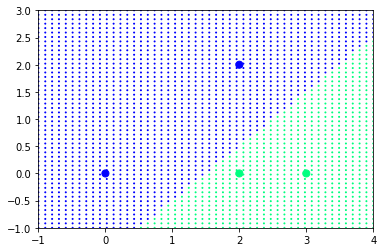

In [18]:
X=np.array([[0,0],[2,2],[2,0],[3,0]])
y=np.array([-1,-1,1,1])

bornex=np.array([np.min(X[:,0]-1),np.max(X[:,0]+1)])
borney=np.array([np.min(X[:,1]-1),np.max(X[:,1]+1)])

model = svm.SVC(kernel='linear', C=0.5) 
model.fit(X, y)
w = model.coef_[0] 
b = model.intercept_[0]

aff_frontiere(X,y,bornex,borney,model)